**Chains in Langchain:**

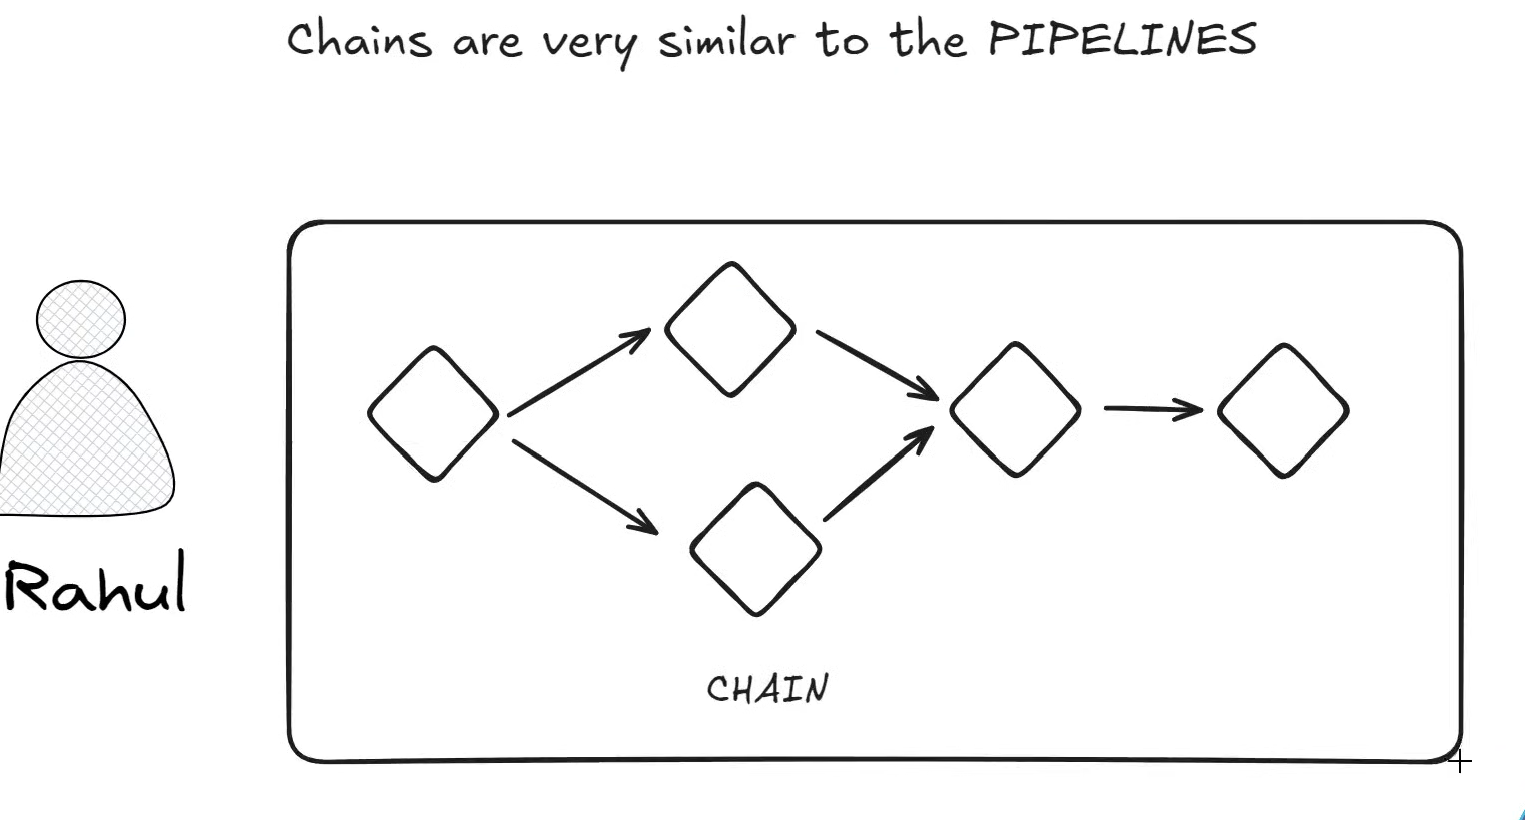

In [12]:
# LLM Initialization
import os
#from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage

#load_dotenv()
if os.environ.get("GROQ_API_KEY"):
    print("API key exists")
else:
    raise ValueError("Groq API Key not found")


groq_api_key =os.environ.get("GROQ_API_KEY")
llm = ChatGroq(api_key=groq_api_key, model="llama-3.1-8b-instant",temperature=0.7,max_tokens=None)

# Put all the imports at the top to make sure we have all modules in our notebook
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableSequence


API key exists


### **First Chain:**


In [6]:
# Task-1 [Prompt]
prompt_template=ChatPromptTemplate.from_messages([
("system","You are a helpful assistant"),
("human","{input}")
])

# Task-2 [LLM]
llm_groq=ChatGroq(api_key=groq_api_key, model="llama-3.1-8b-instant",temperature=0.7,max_tokens=None)

# Task-3 [String Parser]
str_parser=StrOutputParser()



### **Manual Invocation:**


In [ ]:
# Manual Invocation without using chains
template=prompt_template.invoke({"input":"What is the capital of India"})
res=llm_groq.invoke(template)
final_result=res.content
final_result

'The capital of India is New Delhi.'

### **Chain Invocation:**

In [ ]:
chain=prompt_template | llm_groq | str_parser
chain.invoke({"input":"What is the capital of India"})

'The capital of India is New Delhi.'

**This is the visual representation of how chain works**

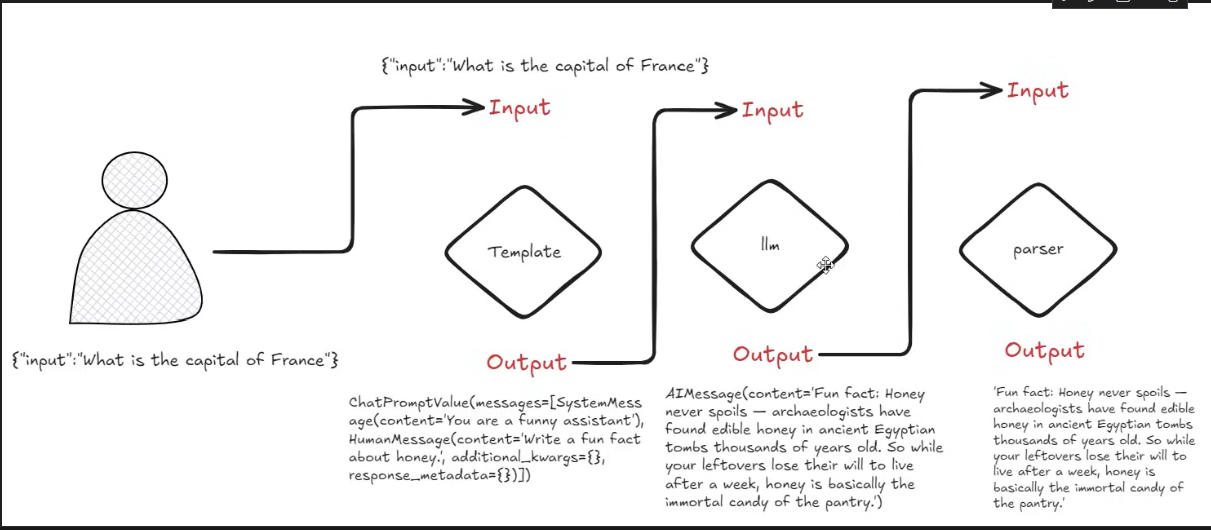

**Using RunnableSequence:**


In [13]:
chain_1=RunnableSequence(prompt_template,llm_groq,str_parser)
chain_1.invoke("What is the capital of India")

'The capital of India is New Delhi.'